# Лабораторная работа №6

In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline

# Загрузка датасета
news_df = pd.read_json('datasets/NewsCategoryDataset/News_Category_Dataset_v3.json', lines=True)  # Укажите корректный путь
print(news_df.head(3))



                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  


In [2]:
# Проверка данных
print(news_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB
None


In [3]:
# Выбираем необходимые признаки
news_df = news_df[['headline', 'category', 'date']]

# Конвертируем дату в формат datetime
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['year'] = news_df['date'].dt.year
news_df.drop(columns=['date'], inplace=True)

# Конвертируем категорию в числовую метку
category_map = {category: idx for idx, category in enumerate(news_df['category'].unique())}
news_df['category_encoded'] = news_df['category'].map(category_map)

# Целевая переменная: популярность (эмуляция в зависимости от длины заголовка)
news_df['popularity'] = news_df['headline'].apply(lambda x: len(x))

# Разделение на train/test
train_df, test_df = train_test_split(news_df, test_size=0.3, random_state=42)

print('Размер обучающей выборки:', train_df.shape)
print('Размер тестовой выборки:', test_df.shape)

Размер обучающей выборки: (146668, 5)
Размер тестовой выборки: (62859, 5)


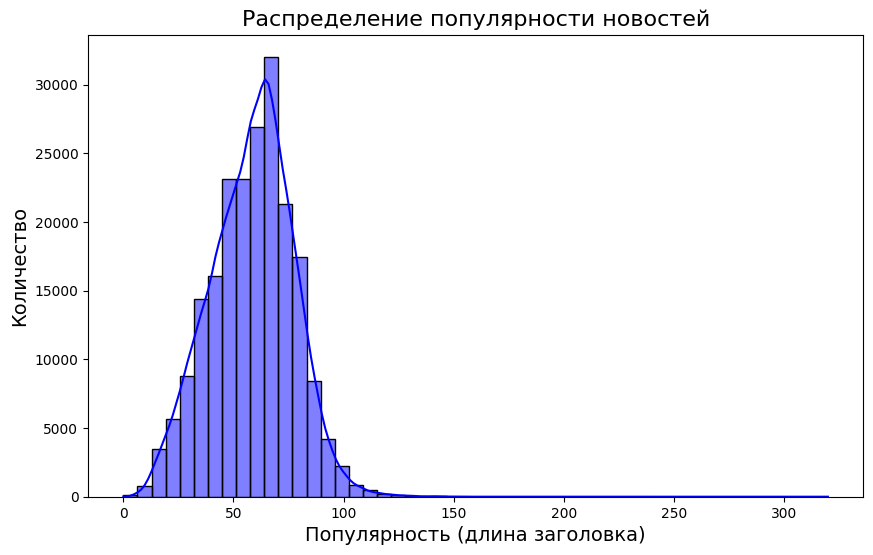

C:\Users\nrg\AppData\Local\Temp\ipykernel_21392\323080863.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


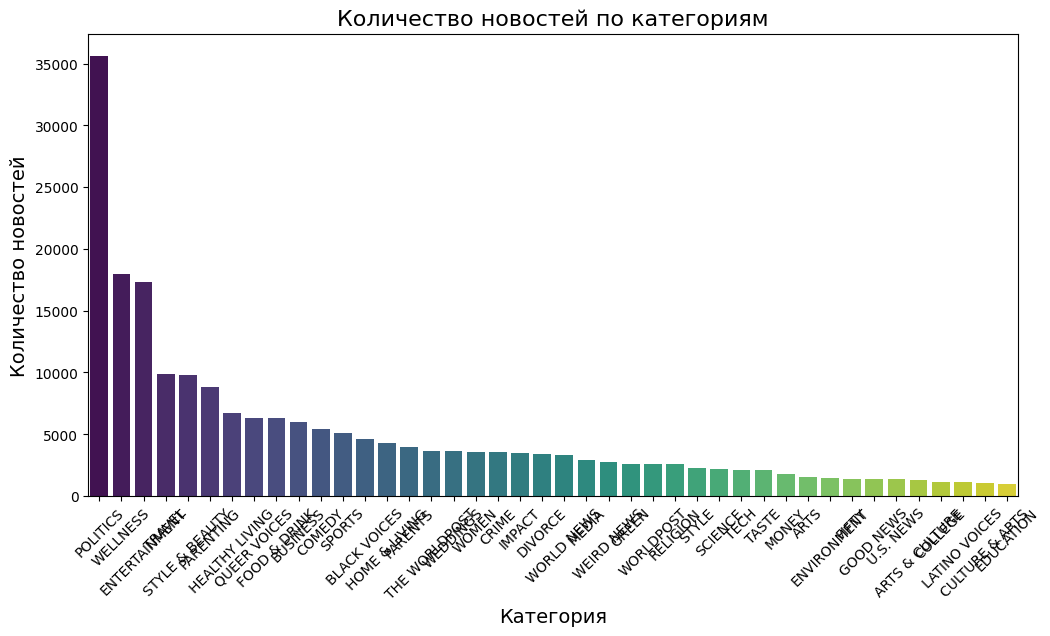

C:\Users\nrg\AppData\Local\Temp\ipykernel_21392\323080863.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_popularity.index, y=category_popularity.values, palette='coolwarm')


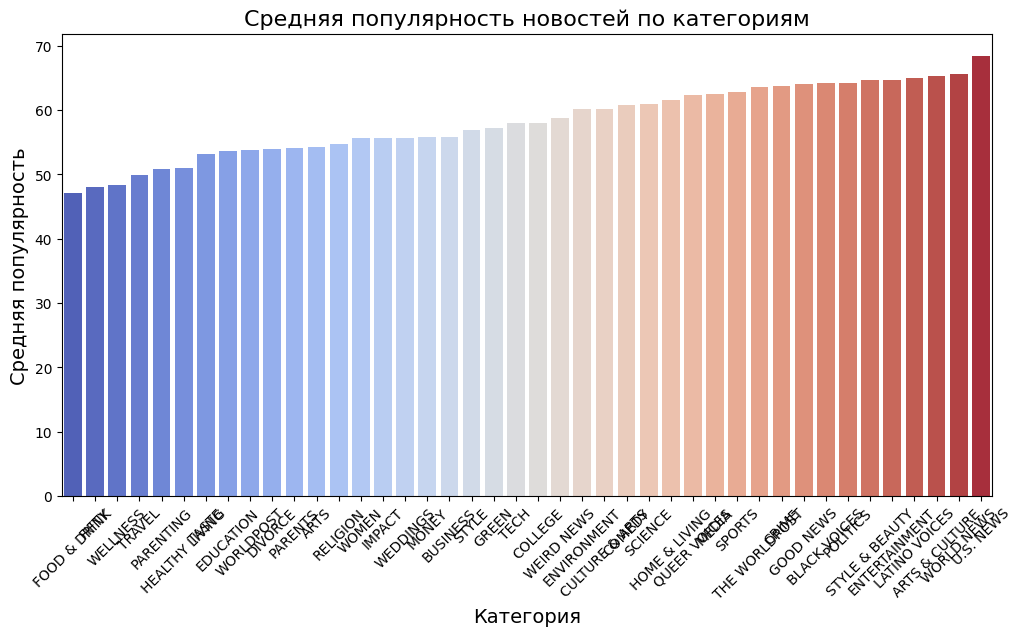

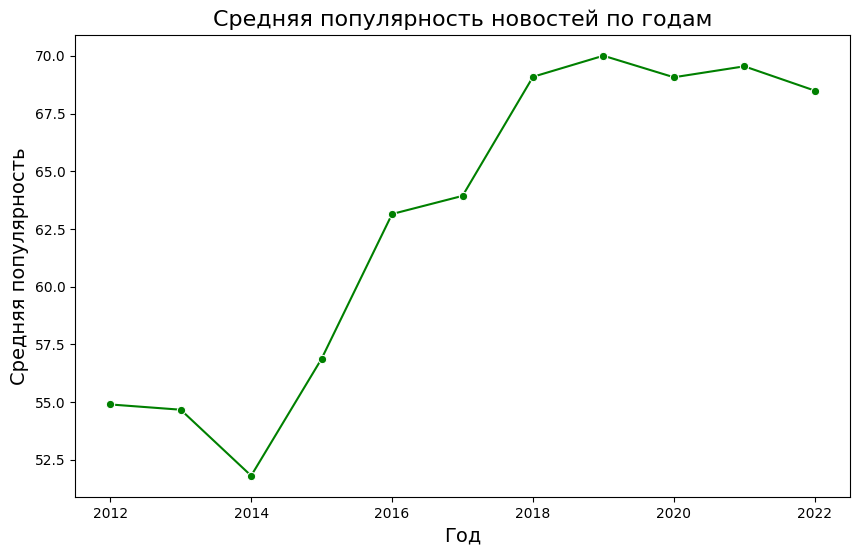

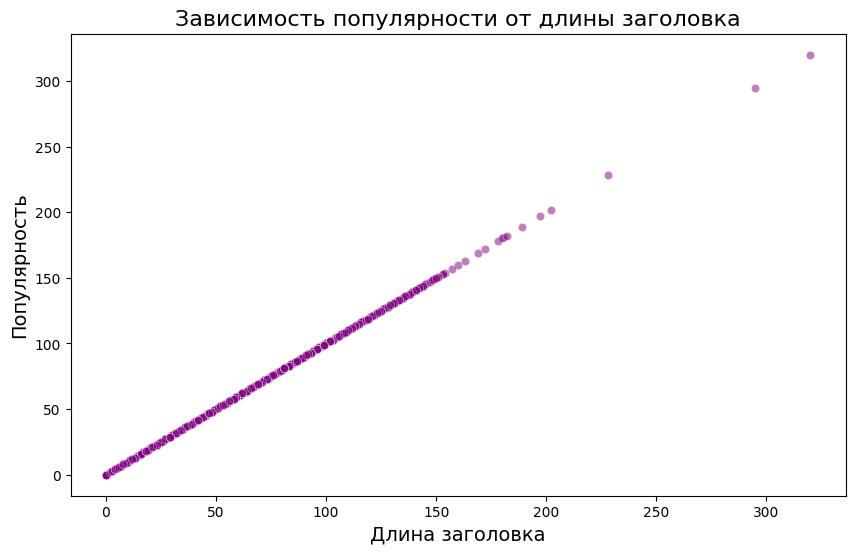

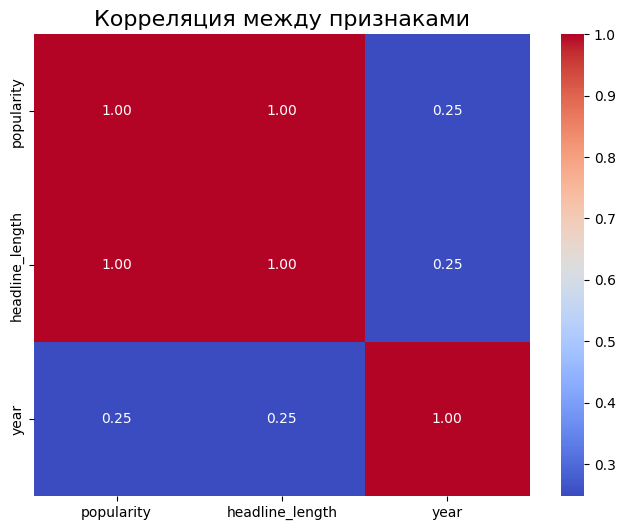

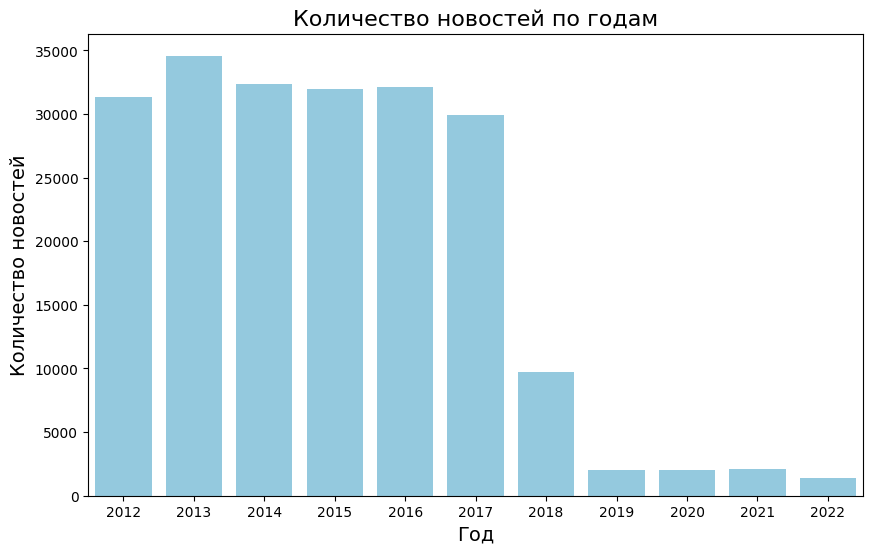

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Распределение популярности новостей
plt.figure(figsize=(10, 6))
sns.histplot(news_df['popularity'], bins=50, kde=True, color='blue')
plt.title('Распределение популярности новостей', fontsize=16)
plt.xlabel('Популярность (длина заголовка)', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show()

# 2. Распределение новостей по категориям
plt.figure(figsize=(12, 6))
category_counts = news_df['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Количество новостей по категориям', fontsize=16)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Количество новостей', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 3. Популярность в разрезе категорий
plt.figure(figsize=(12, 6))
category_popularity = news_df.groupby('category')['popularity'].mean().sort_values()
sns.barplot(x=category_popularity.index, y=category_popularity.values, palette='coolwarm')
plt.title('Средняя популярность новостей по категориям', fontsize=16)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 4. Тренды популярности по годам
plt.figure(figsize=(10, 6))
yearly_popularity = news_df.groupby('year')['popularity'].mean()
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, marker='o', color='green')
plt.title('Средняя популярность новостей по годам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.show()

# 5. Длина заголовка vs Популярность
plt.figure(figsize=(10, 6))
news_df['headline_length'] = news_df['headline'].apply(len)
sns.scatterplot(data=news_df, x='headline_length', y='popularity', alpha=0.5, color='purple')
plt.title('Зависимость популярности от длины заголовка', fontsize=16)
plt.xlabel('Длина заголовка', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.show()

# 6. Корреляционная матрица
plt.figure(figsize=(8, 6))
corr_matrix = news_df[['popularity', 'headline_length', 'year']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между признаками', fontsize=16)
plt.show()

# 7. Количество новостей по годам
plt.figure(figsize=(10, 6))
news_per_year = news_df['year'].value_counts().sort_index()
sns.barplot(x=news_per_year.index, y=news_per_year.values, color='skyblue')
plt.title('Количество новостей по годам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество новостей', fontsize=14)
plt.show()


In [5]:
# Создаем TF-IDF представление заголовков
vectorizer_title = TfidfVectorizer(min_df=3, max_df=0.3, ngram_range=(1, 3))

X_train_title = vectorizer_title.fit_transform(train_df['headline'])
X_test_title = vectorizer_title.transform(test_df['headline'])

print('TF-IDF матрица заголовков (Train):', X_train_title.shape)
print('TF-IDF матрица заголовков (Test):', X_test_title.shape)


TF-IDF матрица заголовков (Train): (146668, 116931)
TF-IDF матрица заголовков (Test): (62859, 116931)


In [6]:
# Преобразуем категориальные данные в числовые
feats = ['category_encoded', 'year']

vectorizer_feats = DictVectorizer()

X_train_feats = vectorizer_feats.fit_transform(train_df[feats].to_dict(orient='records'))
X_test_feats = vectorizer_feats.transform(test_df[feats].to_dict(orient='records'))

print('Матрица категориальных признаков (Train):', X_train_feats.shape)
print('Матрица категориальных признаков (Test):', X_test_feats.shape)


Матрица категориальных признаков (Train): (146668, 2)
Матрица категориальных признаков (Test): (62859, 2)


In [7]:
# Объединяем текстовые и категориальные признаки
X_train = scipy.sparse.hstack([X_train_title, X_train_feats])
X_test = scipy.sparse.hstack([X_test_title, X_test_feats])

y_train = train_df['popularity']
y_test = test_df['popularity']

print('Объединенная матрица признаков (Train):', X_train.shape)
print('Объединенная матрица признаков (Test):', X_test.shape)



Объединенная матрица признаков (Train): (146668, 116933)
Объединенная матрица признаков (Test): (62859, 116933)


In [8]:
# Обучение модели
model = Ridge(alpha=0.1, random_state=1)
model.fit(X_train, y_train)

# Предсказания и оценка модели
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print('Ошибка на трейне:', mean_squared_error(y_train, train_preds))
print('Ошибка на тесте:', mean_squared_error(y_test, test_preds))


Ошибка на трейне: 19.76124521468844
Ошибка на тесте: 81.87377825659958


In [9]:
# Пример предсказания популярности для тестовых данных
test_df['predicted_popularity'] = test_preds
print(test_df[['headline', 'category', 'popularity', 'predicted_popularity']].head(10))


                                                 headline        category  \
128310    What If We Were All Family Generation Changers?          IMPACT   
139983        Firestorm At AOL Over Employee Benefit Cuts        BUSINESS   
42339   Dakota Access Protesters Arrested As Deadline ...        POLITICS   
131494  One Glimpse Of These Baby Kit Foxes And You'll...           GREEN   
163649  Mens' Sweat Pheromone, Androstadienone, Influe...         SCIENCE   
192926                              Summer Sleepover Tips       PARENTING   
183417                                    End of the Year        WELLNESS   
35735       Maybe Colleges Should Take A Lesson From Zoos         SCIENCE   
139757  Supermodel Stephanie Seymour Does Sexy Photo S...  STYLE & BEAUTY   
29057   American Attitudes About Guns Have Become Much...        POLITICS   

        popularity  predicted_popularity  
128310          47             49.094119  
139983          43             58.687917  
42339           67     